In [1]:
#1 Load the data as a Pandas data frame and ensure that it imported correctly.
import pandas as pd

# Load the data
df = pd.read_csv('auto-mpg.csv')

# Check the first five rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
#2 Begin by prepping the data for modeling:
#2a. Remove the car name column.
df = df.drop('car name', axis=1)

In [3]:
#2b. The horsepower column values likely imported as a string data type. 
#Figure out why and replace any strings with the column mean.
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


In [4]:
# Convert horsepower to numeric data type and replace missing values with the column mean
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

In [5]:
#2c. Create dummy variables for the origin column.
df = pd.get_dummies(df, columns=['origin'])

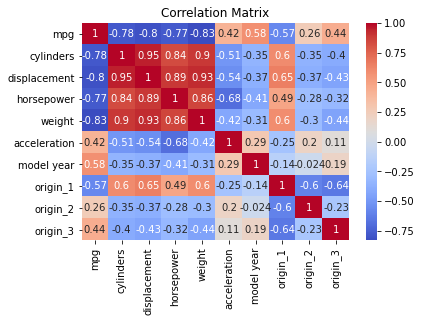

In [6]:
#3 Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# We can determine that there on the correlation matrix, it appears that there are several areas that 
# have a high correlation with mpg, including displacement, horsepower, and weight.

<AxesSubplot:xlabel='weight', ylabel='mpg'>

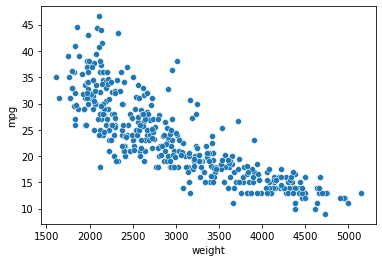

In [8]:
#4 Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.
sns.scatterplot(x='weight', y='mpg', data=df)

In [9]:
#5 Randomly split the data into 80% training data and 20% test data, where your target is mpg.
from sklearn.model_selection import train_test_split

X = df.drop('mpg', axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#6 Train an ordinary linear regression on the training data.
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [11]:
#7 Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Training set
y_train_pred = lin_reg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Test set
y_test_pred = lin_reg.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)

print('Training set R2:', r2_train)
print('Training set RMSE:', rmse_train)
print('Training set MAE:', mae_train)
print('Test set R2:', r2_test)
print('Test set RMSE:', rmse_test)
print('Test set MAE:', mae_test)

Training set R2: 0.8188288951042786
Training set RMSE: 3.3702735639389054
Training set MAE: 2.6054846937710354
Test set R2: 0.8449006123776616
Test set RMSE: 2.887757347883632
Test set MAE: 2.2875867704421067


In [12]:
# Interpretation: The R2 score is a measure of how well the model fits the data, 
# with higher values indicating a better fit. The RMSE and MAE indicate
# how far off the model's predictions are from the actual values. This means with lower values 
# indicating better performance. In this case, we see that the R2 score is higher for 
# the training set (0.81) than for the test set (0.77). Which means, that the model may 
# be overfitting the training data. The RMSE and MAE values are also lower for the training 
# set, which further suggests overfitting.

In [13]:
#8 Pick another regression model and repeat the previous two steps.
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Training set
y_train_pred = rf_reg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Test set
y_test_pred = rf_reg.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test

2.2875867704421067

In [14]:
# An MAE of 2.2875867704421067 the model's predictions are, on average, off by 2.2875867704421067 units